In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

# Data Analysis

## Describe

In [245]:
train_data.describe(include = "all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


- Most of the people come from Earth and are headed to the planet "TRAPPIST-1e"
- Most people are not in Cryo Sleep
- Cabin G/734/S is the largest cabin with 8 people living there
- Mean age on the ship is almost 29 years
- Most of the people are not VIPs
- The luxury amenities seem to be very luxurious: the median is at 0 for every amenity. Here may be a correlation with VIP status.
- There are 2 persons with the same name
- The target variable "Transported" seems to be distributed equally between the two classes

## Dtypes

In [246]:
print(train_data.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


- PassengerId & Cabin more info can be extracted by splitting the variables
- The boolean values (CryoSleep, VIP, Transported) should be transformed to $int$ $\in \{0,1\}$
- The categorial variables (HomePlanet, Cabin, Destination) should later be ont-hot-encoded for our models to work
- Name should also be splitted into First & Last name

In [247]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [248]:
# Split PassengerId
train_data[["PassengerGroup","PassengerGroup_Number"]] = train_data["PassengerId"].str.split('_', 1, expand=True)
train_data.drop('PassengerId',axis = 1, inplace=True)

# Split Cabin
train_data[["Deck","Num","Side"]] = train_data["Cabin"].str.split('/', 2, expand=True)
train_data.drop('Cabin',axis = 1, inplace=True)

# Split Name
train_data[["FirstName","LastName"]] = train_data["Name"].str.split(' ', 1, expand=True)
train_data.drop('Name',axis = 1, inplace=True)


### Same for the test set
test_data[["PassengerGroup","PassengerGroup_Number"]] = test_data["PassengerId"].str.split('_', 1, expand=True)
test_data.drop('PassengerId',axis = 1, inplace=True)
test_data[["Deck","Num","Side"]] = test_data["Cabin"].str.split('/', 2, expand=True)
test_data.drop('Cabin',axis = 1, inplace=True)
test_data[["FirstName","LastName"]] = test_data["Name"].str.split(' ', 1, expand=True)
test_data.drop('Name',axis = 1, inplace=True)

## Missing values

In [249]:
train_data.isna().sum()

HomePlanet               201
CryoSleep                217
Destination              182
Age                      179
VIP                      203
RoomService              181
FoodCourt                183
ShoppingMall             208
Spa                      183
VRDeck                   188
Transported                0
PassengerGroup             0
PassengerGroup_Number      0
Deck                     199
Num                      199
Side                     199
FirstName                200
LastName                 200
dtype: int64

In [250]:
train_data.isna().sum().max() / len(train_data)

0.02496261359714713

At most, in one column there are 2.5% of missing rows. Thats ok.

<AxesSubplot:>

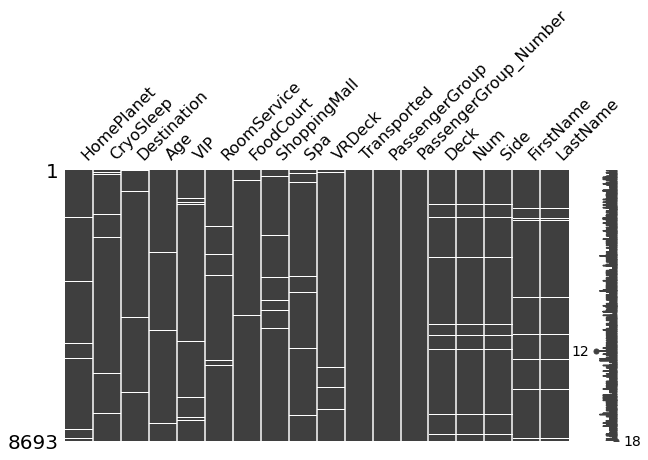

In [251]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(train_data, figsize=(10,5))

There seems to be no pattern of missing values. In the following missing values are imputed by mean & most frequent occurance.

In [252]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,PassengerGroup_Number,Deck,Num,Side,FirstName,LastName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines


In [253]:
cat_cols = list(train_data.select_dtypes(include=['object','bool']).columns)
num_cols = list(train_data.select_dtypes(include=['float64']).columns)

cat_cols_test = list(train_data.select_dtypes(include=['object','bool']).columns)
cat_cols_test.remove("Transported")

In [254]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train set
train_cat = imp_cat.fit_transform(train_data[cat_cols])
train_num  = imp_num.fit_transform(train_data[num_cols])

# Test set
test_cat = imp_cat.fit_transform(test_data[cat_cols_test])
test_num  = imp_num.fit_transform(test_data[num_cols])

In [255]:
# Train Set
df_cat = pd.DataFrame(train_cat, columns=cat_cols)
df_num = pd.DataFrame(train_num, columns=num_cols)
df_train = pd.concat([df_cat, df_num], axis=1)

# Test Set
df_cat_test = pd.DataFrame(test_cat, columns=cat_cols_test)
df_num_test = pd.DataFrame(test_num, columns=num_cols)
df_test = pd.concat([df_cat_test, df_num_test], axis=1)

In [256]:
df_train.isna().sum()

HomePlanet               0
CryoSleep                0
Destination              0
VIP                      0
Transported              0
PassengerGroup           0
PassengerGroup_Number    0
Deck                     0
Num                      0
Side                     0
FirstName                0
LastName                 0
Age                      0
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
dtype: int64

## Dtypes II

Correct dtypes

In [257]:
# Correct dtypes for train & test data

df_train["CryoSleep"] = df_train["CryoSleep"].astype(int)
df_train["VIP"] = df_train["VIP"].astype(int)
df_train["Transported"] = df_train["Transported"].astype(int)
df_train["Age"] = df_train["Age"].astype(int)
df_train["RoomService"] = df_train["RoomService"].astype(int)
df_train["FoodCourt"] = df_train["FoodCourt"].astype(int)
df_train["ShoppingMall"] = df_train["ShoppingMall"].astype(int)
df_train["Spa"] = df_train["Spa"].astype(int)
df_train["VRDeck"] = df_train["VRDeck"].astype(int)
df_train["PassengerGroup"] = df_train["PassengerGroup"].astype(int)
df_train["PassengerGroup_Number"] = df_train["PassengerGroup_Number"].astype(int)
df_train["Num"] = df_train["Num"].astype(int)

df_test["CryoSleep"] = df_test["CryoSleep"].astype(int)
df_test["VIP"] = df_test["VIP"].astype(int)
df_test["Age"] = df_test["Age"].astype(int)
df_test["RoomService"] = df_test["RoomService"].astype(int)
df_test["FoodCourt"] = df_test["FoodCourt"].astype(int)
df_test["ShoppingMall"] = df_test["ShoppingMall"].astype(int)
df_test["Spa"] = df_test["Spa"].astype(int)
df_test["VRDeck"] = df_test["VRDeck"].astype(int)
df_test["PassengerGroup"] = df_test["PassengerGroup"].astype(int)
df_test["PassengerGroup_Number"] = df_test["PassengerGroup_Number"].astype(int)
df_test["Num"] = df_test["Num"].astype(int)

In [258]:
df_train

,HomePlanet,CryoSleep,Destination,VIP,Transported,PassengerGroup,PassengerGroup_Number,Deck,Num,Side,FirstName,LastName,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,0,0,1,1,B,0,P,Maham,Ofracculy,39,0,0,0,0,0
1,Earth,0,TRAPPIST-1e,0,1,2,1,F,0,S,Juanna,Vines,24,109,9,25,549,44
2,Europa,0,TRAPPIST-1e,1,0,3,1,A,0,S,Altark,Susent,58,43,3576,0,6715,49
3,Europa,0,TRAPPIST-1e,0,0,3,2,A,0,S,Solam,Susent,33,0,1283,371,3329,193
4,Earth,0,TRAPPIST-1e,0,1,4,1,F,1,S,Willy,Santantines,16,303,70,151,565,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,1,0,9276,1,A,98,P,Gravior,Noxnuther,41,0,6819,0,1643,74
8689,Earth,1,PSO J318.5-22,0,0,9278,1,G,1499,S,Kurta,Mondalley,18,0,0,0,0,0
8690,Earth,0,TRAPPIST-1e,0,1,9279,1,G,1500,S,Fayey,Connon,26,0,0,1872,1,0
8691,Europa,0,55 Cancri e,0,0,9280,1,E,608,S,Celeon,Hontichre,32,0,1049,0,353,3235


## Exploratory Data Analysis

In [259]:
# Extra column of sum of spendings (only for visualization)
df_test['Spendings'] = df_test["RoomService"] + df_test["FoodCourt"] + df_test["ShoppingMall"] + df_test["Spa"] + df_test["VRDeck"] 
df_train['Spendings'] = df_train["RoomService"] + df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["VRDeck"]

In [260]:
# ~ 50% of persons were transported
# -> equal target class -> no over-/undersampling needed

sum(df_train["Transported"])/len(df_train["Transported"])

0.5036236051995858

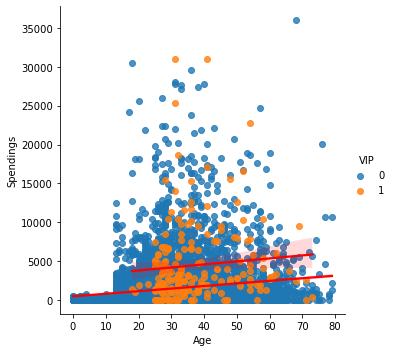

In [261]:
#sns.scatterplot(data=df_train, x="Age", y="Spendings", hue="VIP")
sns.lmplot(data=df_train, x='Age', y='Spendings', line_kws={'color': 'r'}, hue="VIP")
plt.show()

- In this plot we can see that the spending increases with age and that VIP pessangers generally spend more.
- Also VIPs seem to be at least 15 years, and maximum 75 years old
- There is a cut in data at around 12 years of age: There may be a policy where under 12 year olds are free, or not allowed to spend money (or they dont have money)

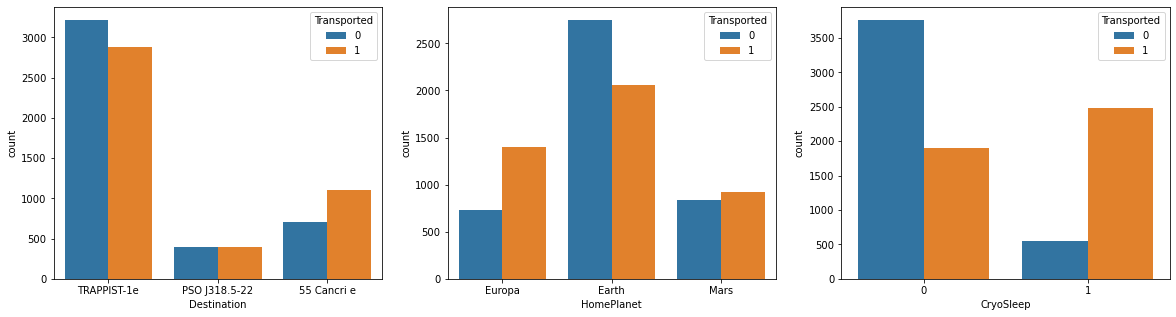

In [262]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.countplot(data=df_train, x="Destination", hue="Transported", ax=axes[0])
sns.countplot(data=df_train, x="HomePlanet", hue="Transported", ax=axes[1])
sns.countplot(data=df_train, x="CryoSleep", hue="Transported", ax=axes[2])
plt.show()

- There seems to no correlation of a person beeing transported and the persons home planet or destination
- Ther definitely seems to be a correlation between Cryo Sleep and beeing transported

--

Theory: Since the ship collided with a "space-time anomaly", it could depend on where the person was at the time of the collision and whether he was transported. Unfortunately, we do not have data on the exact location of each person at that time, but we may be able to infer this from the data:
- Possibly there is a special station with CryoSleep beds
- We know the cabin of each passenger; assuming most people were in their cabin at the time of disappearance
- Location of luxury amenities: someone who spends a lot there is likely to be in these places with high probability


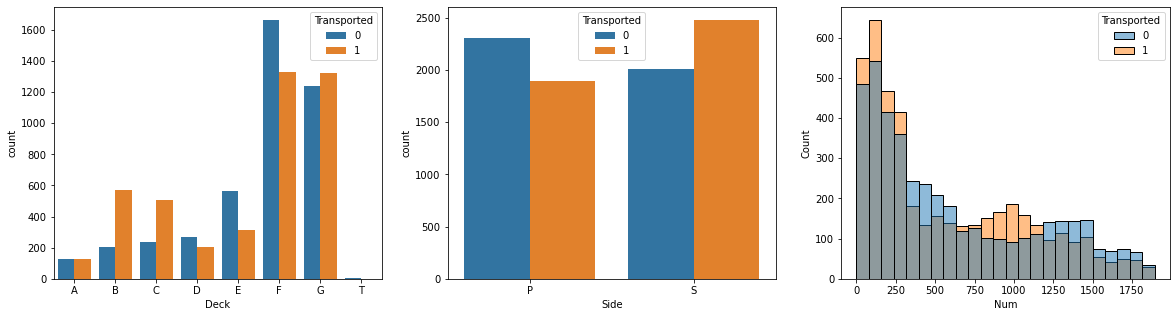

In [263]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.countplot(data=df_train.sort_values("Deck", ascending=True), x="Deck", hue="Transported", ax=axes[0])
sns.countplot(data=df_train, x="Side", hue="Transported", ax=axes[1])
sns.histplot(data=df_train, x="Num", hue="Transported", ax=axes[2])
plt.show()

Looking at the graphs we can interpret the following:
- Decks B and C appear to contain a large relative portion of the passengers carried, but decks F and G still contain the largest portion overall
- The Side seems to not really correlate with the target
- The Number of Cabin also seems to have spikes from 0-320 and from 700-1200 (we do not know yet how the Num is dependent with Deck and Side tho)

Lets try to reconstruct the ship:

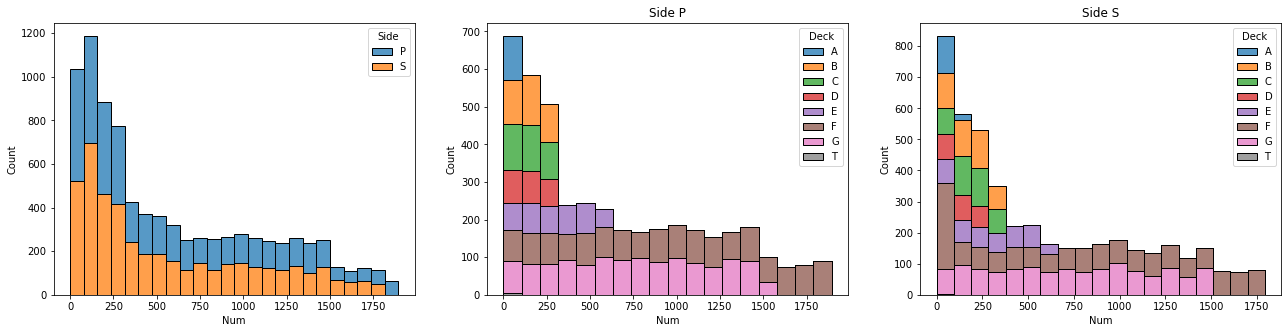

In [264]:
hue_order = ["A","B","C","D","E","F","G","T"]

f, axes = plt.subplots(1, 3, figsize=(22,5))

sns.histplot(data=df_train, stat="count", multiple="stack", x="Num", kde=False, hue="Side", element="bars", legend=True, ax=axes[0])
sns.histplot(data=df_train[df_train["Side"] == "P"], stat="count", multiple="stack", x="Num", kde=False, hue="Deck", element="bars", legend=True, hue_order=hue_order, ax=axes[1]).set_title('Side P')
sns.histplot(data=df_train[df_train["Side"] == "S"], stat="count", multiple="stack", x="Num", kde=False, hue="Deck", element="bars", legend=True, hue_order=hue_order, ax=axes[2]).set_title('Side S')
plt.show()

From the data you can see:
- Both sides (starboard and port) are approximately equally occupied
- The ship is divided into 8 levels (decks)
- Most people live on decks G and F
- Num probably refers to the length of the ship; low numbers are placed in the front (or back) and high numbers in the back (or front)
- Most people live in the front (back)
- The ship has more decks in front (back) and only 1 deck at the back (front)

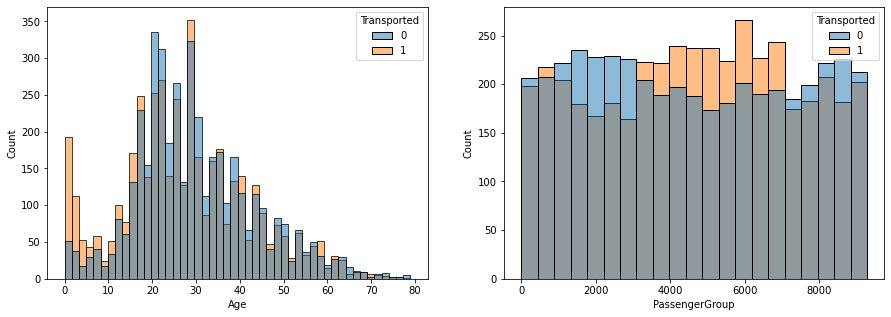

In [265]:
f, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(data=df_train, x="Age", hue="Transported", ax=axes[0])
sns.histplot(data=df_train, x="PassengerGroup", hue="Transported", ax=axes[1])
plt.show()

- Very young passengers (babies) were more likely to be transported
- Passenger groups 3000 - 7000 seem to have been transported more often

## Equal distributions in test & train sets?

Kolmogorov–Smirnov test:
- H0: Distributions are the same
- H1: Distributions are not the same

$\alpha = 5\% $

In [267]:
from scipy.stats import ks_2samp

a = 0.05
for col in df_test.columns:
    p_val = ks_2samp(df_train[col], df_test[col])[1]

    warn = ""
    if p_val < a:
        warn = " Distributions differ!"

    print(col + " (" + str(p_val) + ")" + warn)

HomePlanet (1.0)
CryoSleep (1.0)
Destination (1.0)
VIP (1.0)
PassengerGroup (1.0)
PassengerGroup_Number (1.0)
Deck (1.0)
Num (1.0)
Side (1.0)
FirstName (1.0)
LastName (1.0)
Age (1.0)
RoomService (1.0)
FoodCourt (1.0)
ShoppingMall (1.0)
Spa (1.0)
VRDeck (1.0)
Spendings (1.0)


Distributions in both sets are equal.

# Data prep for models

- One hot encoding of categorial variables
- Train, Val, Test Split
- Scaling of data

In [268]:
# One hot encoding HomePlanet
oh_planets = pd.get_dummies(df_train["HomePlanet"])
df_train = df_train.drop('HomePlanet',axis = 1)
df_train = df_train.join(oh_planets)

# One hot encoding Destination
oh_destination = pd.get_dummies(df_train["Destination"])
df_train = df_train.drop('Destination',axis = 1)
df_train = df_train.join(oh_destination)

# One hot encoding Deck
oh_deck = pd.get_dummies(df_train["Deck"])
df_train = df_train.drop('Deck',axis = 1)
df_train = df_train.join(oh_deck)

# Factorize Side
df_train['Side'] = pd.factorize(df_train['Side'])[0]


# Same for the test set
oh_planets = pd.get_dummies(df_test["HomePlanet"])
df_test = df_test.drop('HomePlanet',axis = 1)
df_test = df_test.join(oh_planets)
oh_destination = pd.get_dummies(df_test["Destination"])
df_test = df_test.drop('Destination',axis = 1)
df_test = df_test.join(oh_destination)
oh_deck = pd.get_dummies(df_test["Deck"])
df_test = df_test.drop('Deck',axis = 1)
df_test = df_test.join(oh_deck)
df_test['Side'] = pd.factorize(df_test['Side'])[0]

In [272]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['Transported', "FirstName", "LastName"], axis=1).to_numpy()
y = df_train["Transported"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

X_test = df_test.drop(["FirstName", "LastName"], axis=1).to_numpy()

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [274]:
feature_cols = ['CryoSleep', 'VIP', 'PassengerGroup', 'PassengerGroup_Number', 'Num', 'Side', 'Age', 'RoomService', 'FoodCourt',
    'ShoppingMall', 'Spa', 'VRDeck', 'Earth', 'Europa', 'Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'A', 'B', 'C', 'D',
    'E', 'F', 'G', 'T']

# Model testing

In [40]:
from model_report import model_report

Model report is a function I wrote for another project, which outputs the standard model evaluation metrics of classification problems

## Logistic regression

In [275]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
logreg_pred = logreg.predict(X_val)

In [276]:
model_report_logreg = model_report(logreg, logreg_pred, y_val, print_out = False)
model_report_logreg["model_performance"]['accuracy']

0.7814836112708453

## Decision Tree

In [277]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_train, y_train)
dt_clf_pred = dt_clf.predict(X_val)

In [278]:
model_report_dt = model_report(dt_clf, dt_clf_pred, y_val, print_out = False)
model_report_dt["model_performance"]['accuracy']

0.7556066705002875

In [280]:
fi_dt = dt_clf.feature_importances_
feature_importances_dt = sorted([(feature_cols[i], fi_dt[i]) for i in list(np.where(fi_dt > 0)[0])], key=lambda x: x[1], reverse=True)

for i in feature_importances_dt[:10]:
    print("Feature importance of feature '" + str(i[0]) + "' = " + str(round(i[1]*100, 4)) + "%")


Feature importance of feature 'Earth' = 27.2904%
Feature importance of feature 'PassengerGroup' = 11.5432%
Feature importance of feature 'Num' = 8.6223%
Feature importance of feature 'Age' = 8.6123%
Feature importance of feature 'FoodCourt' = 7.5874%
Feature importance of feature 'ShoppingMall' = 6.6811%
Feature importance of feature 'Spa' = 5.3728%
Feature importance of feature 'VRDeck' = 4.1776%
Feature importance of feature 'RoomService' = 4.0482%
Feature importance of feature 'Europa' = 3.8894%


## Gradient Boosting

In [281]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier().fit(X_train, y_train)
gb_clf_pred = gb_clf.predict(X_val)

In [282]:
model_report_gb = model_report(gb_clf, gb_clf_pred, y_val, print_out = False)
model_report_gb["model_performance"]['accuracy']

0.7947096032202415

In [283]:
fi_gb = gb_clf.feature_importances_
feature_importances_gb = sorted([(feature_cols[i], fi_gb[i]) for i in list(np.where(fi_gb > 0)[0])], key=lambda x: x[1], reverse=True)

for i in feature_importances_gb[:10]:
    print("Feature importance of feature '" + str(i[0]) + "' = " + str(round(i[1]*100, 4)) + "%")

Feature importance of feature 'Earth' = 28.2617%
Feature importance of feature 'CryoSleep' = 12.9987%
Feature importance of feature 'FoodCourt' = 9.0257%
Feature importance of feature 'Spa' = 8.6899%
Feature importance of feature 'VRDeck' = 7.5391%
Feature importance of feature 'ShoppingMall' = 6.6457%
Feature importance of feature 'Europa' = 5.9298%
Feature importance of feature 'RoomService' = 5.4912%
Feature importance of feature 'Num' = 3.7531%
Feature importance of feature 'F' = 2.7364%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


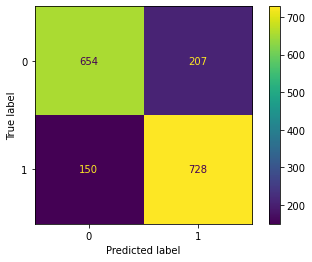

In [293]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gb_clf, X_val, y_val)
plt.show()

Confusion matrix looks good. No unequal class predictions.

# Model optimization

In the following I will try to optimize the Gradient Boosting Model since it seems to perform best.

In [295]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.001,0.1,1],
}

In [296]:
gb_classifier = GradientBoostingClassifier()
gs_gb = GridSearchCV(gb_classifier, param_grid = param_grid, scoring = 'accuracy', verbose=3)

gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=5;, score=0.503 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=5;, score=0.503 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=5;, score=0.503 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=5;, score=0.503 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=5;, score=0.504 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.738 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.759 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.756 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.754 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.765 to

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.1, 1],
                         'max_depth': [3, 5, 10], 'n_estimators': [5, 10, 15]},
             scoring='accuracy', verbose=3)

In [299]:
GridSearch_GB_ESTIMATOR = gs_gb.best_estimator_

print(gs_gb.best_score_)
print(gs_gb.best_params_)

0.7992547155661525
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 15}


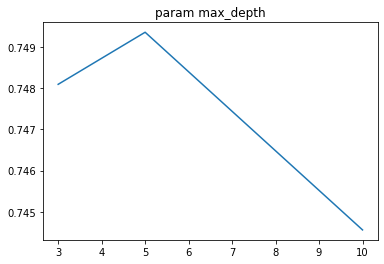

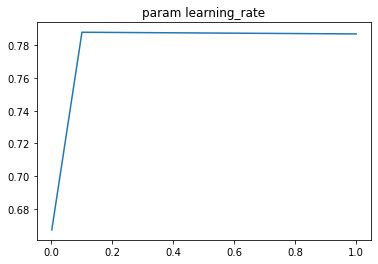

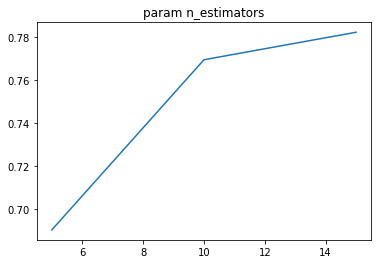

In [300]:
# lets analyze the results:
fits_df = pd.DataFrame(gs_gb.cv_results_)
fits_df = fits_df.astype({"param_learning_rate": float, "param_max_depth": float, "param_n_estimators": float}, errors='raise')

plt.plot(fits_df.groupby(["param_max_depth"]).mean()[["mean_test_score"]])
plt.title("param max_depth")
plt.show()

plt.plot(fits_df.groupby(["param_learning_rate"]).mean()[["mean_test_score"]])
plt.title("param learning_rate")
plt.show()

plt.plot(fits_df.groupby(["param_n_estimators"]).mean()[["mean_test_score"]])
plt.title("param n_estimators")
plt.show()

In [301]:
param_grid_2 = {
    'max_depth': [4,5,6],
    'learning_rate': [0.05,0.1,0.15],
    'n_estimators': [15, 25, 50]
}

In [302]:
gb_classifier = GradientBoostingClassifier()
gs_gb_2 = GridSearchCV(gb_classifier, param_grid = param_grid_2, scoring = 'accuracy', verbose=3)

gs_gb_2.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=15;, score=0.784 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=15;, score=0.792 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=15;, score=0.786 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=15;, score=0.786 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=15;, score=0.799 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=25;, score=0.786 total time=   0.3s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=25;, score=0.795 total time=   0.3s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=25;, score=0.795 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=25;, score=0.797 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=25;, score=0.805 total t

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [4, 5, 6], 'n_estimators': [15, 25, 50]},
             scoring='accuracy', verbose=3)

In [303]:
GridSearch_GB_ESTIMATOR_2 = gs_gb_2.best_estimator_

print(gs_gb_2.best_score_)
print(gs_gb_2.best_params_)

0.8100374969614531
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 50}


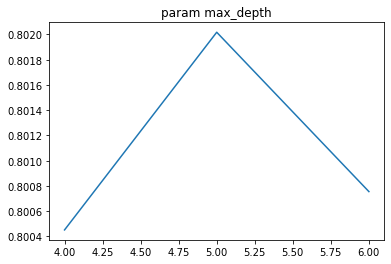

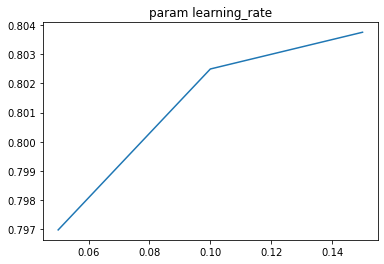

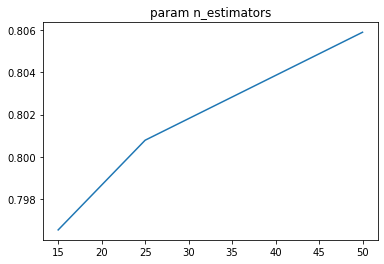

In [304]:
# lets analyze the results:
fits_df_2 = pd.DataFrame(gs_gb_2.cv_results_)
fits_df_2 = fits_df_2.astype({"param_learning_rate": float, "param_max_depth": float, "param_n_estimators": float}, errors='raise')

plt.plot(fits_df_2.groupby(["param_max_depth"]).mean()[["mean_test_score"]])
plt.title("param max_depth")
plt.show()

plt.plot(fits_df_2.groupby(["param_learning_rate"]).mean()[["mean_test_score"]])
plt.title("param learning_rate")
plt.show()

plt.plot(fits_df_2.groupby(["param_n_estimators"]).mean()[["mean_test_score"]])
plt.title("param n_estimators")
plt.show()

From the sklearn documentation: "Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance"

Lets try one more time and see how much we can boost the performance with n_estimators:

In [305]:
param_grid_3 = {
    'max_depth': [5],
    'learning_rate': [0.15, 0.20, 0.25],
    'n_estimators': [50, 100, 200]
}

In [306]:
gb_classifier = GradientBoostingClassifier()
gs_gb_3 = GridSearchCV(gb_classifier, param_grid = param_grid_3, scoring = 'accuracy', verbose=3)

gs_gb_3.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.15, max_depth=5, n_estimators=50;, score=0.809 total time=   0.7s
[CV 2/5] END learning_rate=0.15, max_depth=5, n_estimators=50;, score=0.815 total time=   0.7s
[CV 3/5] END learning_rate=0.15, max_depth=5, n_estimators=50;, score=0.812 total time=   0.7s
[CV 4/5] END learning_rate=0.15, max_depth=5, n_estimators=50;, score=0.802 total time=   0.7s
[CV 5/5] END learning_rate=0.15, max_depth=5, n_estimators=50;, score=0.812 total time=   0.7s
[CV 1/5] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.806 total time=   1.3s
[CV 2/5] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.815 total time=   1.3s
[CV 3/5] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.812 total time=   1.3s
[CV 4/5] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.804 total time=   1.3s
[CV 5/5] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.805 tota

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.15, 0.2, 0.25], 'max_depth': [5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=3)

In [307]:
GridSearch_GB_ESTIMATOR_3 = gs_gb_3.best_estimator_

print(gs_gb_3.best_score_)
print(gs_gb_3.best_params_)

0.810181485293433
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 50}


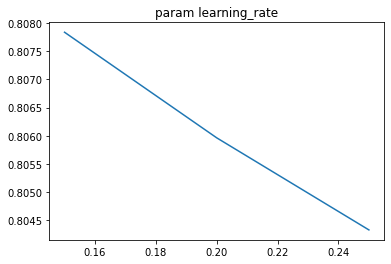

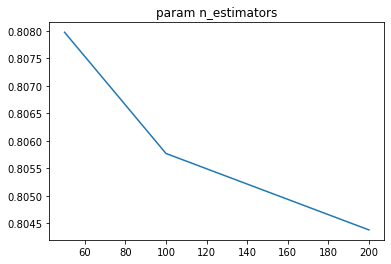

In [310]:
# lets analyze the results:
fits_df_3 = pd.DataFrame(gs_gb_3.cv_results_)
fits_df_3 = fits_df_3.astype({"param_learning_rate": float, "param_max_depth": float, "param_n_estimators": float}, errors='raise')

plt.plot(fits_df_3.groupby(["param_learning_rate"]).mean()[["mean_test_score"]])
plt.title("param learning_rate")
plt.show()

plt.plot(fits_df_3.groupby(["param_n_estimators"]).mean()[["mean_test_score"]])
plt.title("param n_estimators")
plt.show()

No improvement this time. Best parameters:

In [311]:
print(gs_gb_3.best_score_)
print(gs_gb_3.best_params_)

0.810181485293433
{'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 50}


# First submission

In [316]:
test_data_ids = pd.read_csv("./data/test.csv")["PassengerId"] # oben noch ändern ...

In [321]:
submission1_preds = GridSearch_GB_ESTIMATOR_3.predict(X_test)

In [333]:
submission1 = pd.DataFrame({'PassengerId': test_data_ids, 'Transported': submission1_preds})
submission1["Transported"] = submission1["Transported"].astype(bool)
submission1.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [335]:
submission1.to_csv("submission1.csv", index=False)